In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
 data = pd.read_csv("/content/MyDrive/MyDrive/KFall_Data.csv")

In [ ]:
data

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ,Task ID,Trial ID,Description
0,-0.043,-0.729,-0.159,25.439335,0.401071,-0.802141,19.033665,-12.163898,51.995939,20,1,Forward fall when trying to sit down
1,-0.043,-0.719,-0.142,27.731167,0.171887,-1.718874,19.314414,-12.152439,51.978750,20,1,Forward fall when trying to sit down
2,-0.042,-0.709,-0.136,29.965703,2.750198,-2.005353,19.623811,-12.118062,51.967291,20,1,Forward fall when trying to sit down
3,-0.049,-0.711,-0.157,31.971056,2.750198,-0.974029,19.944668,-12.083684,51.967291,20,1,Forward fall when trying to sit down
4,-0.062,-0.726,-0.151,33.575339,2.005353,0.401071,20.282713,-12.060766,51.978750,20,1,Forward fall when trying to sit down
...,...,...,...,...,...,...,...,...,...,...,...,...
5114,0.226,-1.197,0.853,195.837044,12.146710,-51.909995,119.897191,9.310567,-56.373338,34,5,Backward fall while walking caused by a slip
5115,0.272,-1.602,1.089,208.384825,19.251389,-48.472247,122.085891,9.619965,-55.926430,34,5,Backward fall while walking caused by a slip
5116,0.369,-2.180,1.328,209.817220,29.335450,-30.939732,124.286049,9.711638,-55.485253,34,5,Backward fall while walking caused by a slip
5117,0.420,-3.004,1.636,226.891368,39.820581,1.145916,126.640907,9.465266,-55.141478,34,5,Backward fall while walking caused by a slip


In [ ]:
data.shape

(5119, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AccX         5119 non-null   float64
 1   AccY         5119 non-null   float64
 2   AccZ         5119 non-null   float64
 3   GyrX         5119 non-null   float64
 4   GyrY         5119 non-null   float64
 5   GyrZ         5119 non-null   float64
 6   EulerX       5119 non-null   float64
 7   EulerY       5119 non-null   float64
 8   EulerZ       5119 non-null   float64
 9   Task ID      5119 non-null   int64  
 10  Trial ID     5119 non-null   int64  
 11  Description  5119 non-null   object 
dtypes: float64(9), int64(2), object(1)
memory usage: 480.0+ KB


In [ ]:
data.describe()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ,Task ID,Trial ID
count,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000
mean,0.132933,-0.563291,-0.258202,-40.872713,28.289485,-22.273605,57.056081,8.253884,-12.454372,26.890604,3.010354
std,0.614557,0.744524,0.705707,105.493893,90.022572,56.616026,28.819712,16.283491,43.690957,4.197655,1.378706
min,-3.999000,-3.999000,-3.996000,-424.332695,-384.340226,-357.353905,-160.571479,-47.664376,-179.055105,20.000000,1.000000
25%,-0.049000,-0.868000,-0.436000,-98.348241,-10.657019,-33.632635,45.469947,-0.197671,-30.722008,23.000000,2.000000
50%,0.028000,-0.707000,-0.205000,-27.100913,16.386599,-7.104679,61.071593,3.500773,-20.729620,27.000000,3.000000
75%,0.134000,-0.318000,0.029000,6.990088,76.289358,6.760904,74.083469,13.513214,9.872066,30.000000,4.000000
max,3.996000,3.791000,3.880000,451.834679,369.557910,262.758539,174.437063,88.413149,178.917595,34.000000,5.000000


In [ ]:
data.isnull()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ,Task ID,Trial ID,Description
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5114,False,False,False,False,False,False,False,False,False,False,False,False
5115,False,False,False,False,False,False,False,False,False,False,False,False
5116,False,False,False,False,False,False,False,False,False,False,False,False
5117,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().values.any()

False

In [ ]:
data["Description"].unique()

array(['Forward fall when trying to sit down',
       'Backward fall when trying to sit down',
       'lateral fall when trying to sit down',
       'Forward fall when trying to get up',
       'lateral fall when trying to get up',
       'Forward fall while sitting, caused by fainting',
       'lateral fall while sitting, caused by fainting',
       'Backward fall while sitting, caused by fainting',
       'Vertical(forward) fall while walking caused by fainting',
       'Fall while walking, with use of hands in a table to dampen fall, caused by fainting',
       'Forward fall while walking caused by a trip',
       'Forward fall while jogging caused by a trip',
       'Forward fall while walking caused by a slip',
       'Forward lateral fall while walking caused by a slip',
       'Backward fall while walking caused by a slip'], dtype=object)

In [ ]:
pd.crosstab(index = data["Description"],columns="count")

col_0,count
Description,
Backward fall when trying to sit down,159
"Backward fall while sitting, caused by fainting",206
Backward fall while walking caused by a slip,328
"Fall while walking, with use of hands in a table to dampen fall, caused by fainting",336
Forward fall when trying to get up,425
Forward fall when trying to sit down,420
Forward fall while jogging caused by a trip,357
"Forward fall while sitting, caused by fainting",381
Forward fall while walking caused by a slip,316


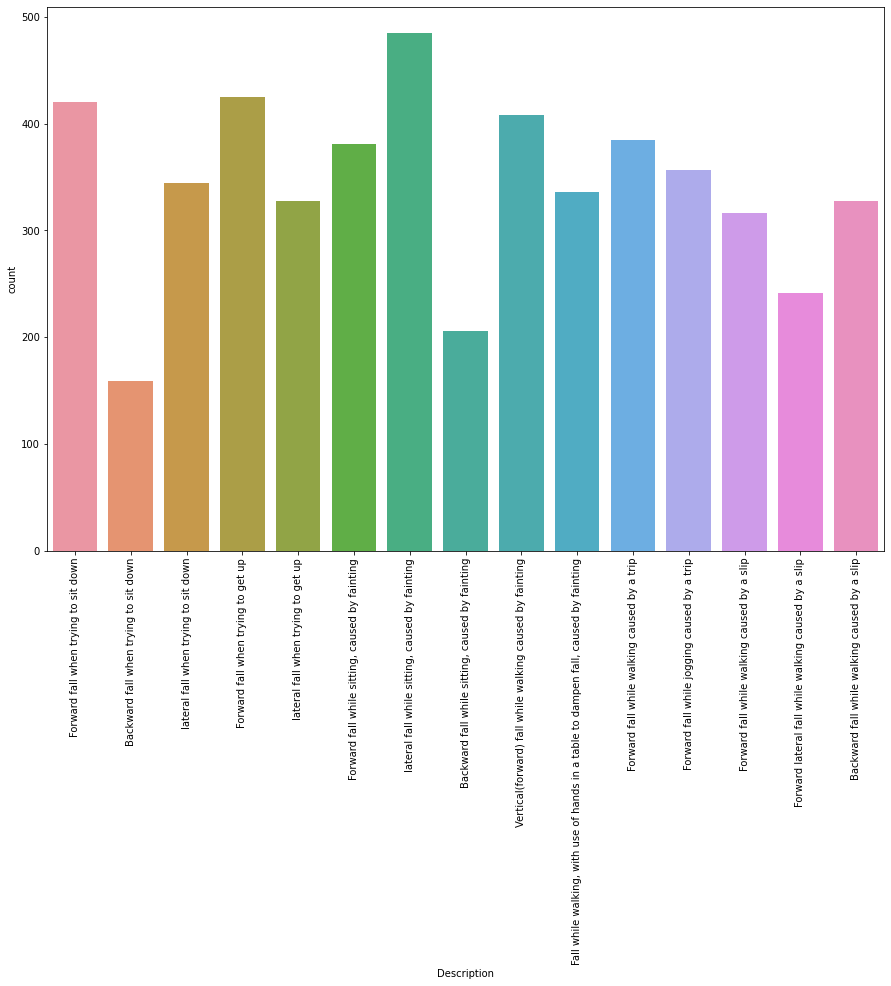

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Description", data=data)
plt.xticks(x = data['Description'],  rotation='vertical')
plt.show()

In [ ]:
data['Task ID'].unique()

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

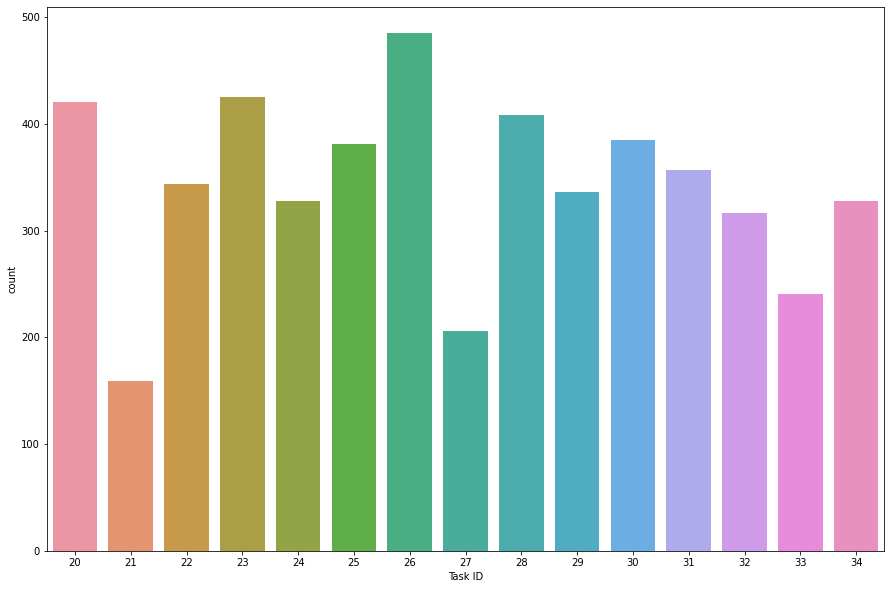

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Task ID", data=data)
plt.xticks(x = data['Task ID'],  rotation='horizontal')
plt.show()

In [ ]:
X = pd.DataFrame(data.drop(['Description','Task ID','Trial ID'],axis=1))
Y = data.Description.values.astype(object)

X.shape, Y.shape

((5119, 9), (5119,))

In [ ]:
Y

array(['Forward fall when trying to sit down',
       'Forward fall when trying to sit down',
       'Forward fall when trying to sit down', ...,
       'Backward fall while walking caused by a slip',
       'Backward fall while walking caused by a slip',
       'Backward fall while walking caused by a slip'], dtype=object)

In [ ]:
X.head()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ
0,-0.043,-0.729,-0.159,25.439335,0.401071,-0.802141,19.033665,-12.163898,51.995939
1,-0.043,-0.719,-0.142,27.731167,0.171887,-1.718874,19.314414,-12.152439,51.978750
2,-0.042,-0.709,-0.136,29.965703,2.750198,-2.005353,19.623811,-12.118062,51.967291
3,-0.049,-0.711,-0.157,31.971056,2.750198,-0.974029,19.944668,-12.083684,51.967291
4,-0.062,-0.726,-0.151,33.575339,2.005353,0.401071,20.282713,-12.060766,51.978750


In [ ]:
Y[1]

'Forward fall when trying to sit down'

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AccX    5119 non-null   float64
 1   AccY    5119 non-null   float64
 2   AccZ    5119 non-null   float64
 3   GyrX    5119 non-null   float64
 4   GyrY    5119 non-null   float64
 5   GyrZ    5119 non-null   float64
 6   EulerX  5119 non-null   float64
 7   EulerY  5119 non-null   float64
 8   EulerZ  5119 non-null   float64
dtypes: float64(9)
memory usage: 360.1 KB


In [ ]:
#Total Number of Continous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 9


In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [ ]:
# encoding train labels 
encoder.fit(Y)
y = encoder.transform(Y)
y.shape

(5119,)

In [ ]:
Y[1]

'Forward fall when trying to sit down'

In [ ]:
np.array(Y)

array(['Forward fall when trying to sit down',
       'Forward fall when trying to sit down',
       'Forward fall when trying to sit down', ...,
       'Backward fall while walking caused by a slip',
       'Backward fall while walking caused by a slip',
       'Backward fall while walking caused by a slip'], dtype=object)

In [ ]:
encoder.classes_

array(['Backward fall when trying to sit down',
       'Backward fall while sitting, caused by fainting',
       'Backward fall while walking caused by a slip',
       'Fall while walking, with use of hands in a table to dampen fall, caused by fainting',
       'Forward fall when trying to get up',
       'Forward fall when trying to sit down',
       'Forward fall while jogging caused by a trip',
       'Forward fall while sitting, caused by fainting',
       'Forward fall while walking caused by a slip',
       'Forward fall while walking caused by a trip',
       'Forward lateral fall while walking caused by a slip',
       'Vertical(forward) fall while walking caused by fainting',
       'lateral fall when trying to get up',
       'lateral fall when trying to sit down',
       'lateral fall while sitting, caused by fainting'], dtype=object)

In [ ]:
encoder.classes_[2]

'Backward fall while walking caused by a slip'

In [ ]:
# Scaling the feature 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X[1]

array([-0.28630459, -0.20915959,  0.16467631,  0.65037492, -0.31236993,
        0.36309047, -1.30970616, -1.2533133 ,  1.47489138])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3583, 9), (1536, 9), (3583,), (1536,))

In [ ]:
X_train

array([[-0.17889972,  0.05949466,  0.17317926, ...,  0.85194209,
        -0.23175132, -0.01040069],
       [ 0.44762872, -0.02378816,  0.41693044, ...,  0.03297326,
         1.34510682,  2.03661376],
       [-0.08451362, -0.01975834, -0.11450382, ..., -0.80170292,
         0.62582585,  0.99986022],
       ...,
       [-0.213074  , -0.02513143, -0.23921373, ..., -1.15104213,
        -0.71983484, -0.44346333],
       [-1.68907735, -4.28867438,  2.4647238 , ...,  1.40845914,
        -1.16639431, -3.38545641],
       [-0.48646822, -0.2037865 ,  0.27804895, ...,  0.65947745,
        -0.28523993,  0.17596576]])

In [ ]:
X_test

array([[-5.52213788e-02,  2.55612265e-01,  3.80084331e-01, ...,
        -4.01662789e-01,  7.35266348e-01,  1.09471889e-01],
       [ 4.97816160e+00,  1.07097791e+00,  6.35172777e-01, ...,
         9.24712805e-01,  3.64828392e+00,  2.95769156e+00],
       [-3.02578059e-01, -1.93040333e-01,  2.76631795e-01, ...,
         1.00961198e+00, -3.46822204e-01,  2.05871402e-03],
       ...,
       [-2.60267048e-01, -4.09307005e-01, -2.95900050e-01, ...,
        -9.16913376e-02, -1.77207023e-01,  6.89162038e-01],
       [-1.17060549e-01, -6.37663118e-01,  9.09840926e-02, ...,
         4.04382281e-01, -4.96731057e-01,  7.10277448e-01],
       [-6.98674981e-02, -2.81696236e-01,  2.01522419e-01, ...,
         9.64279399e-01, -7.47634842e-01, -1.27089889e+00]])

In [ ]:
y_train

array([ 6, 12, 14, ...,  7,  3, 10])

In [ ]:
y_test

array([ 6, 13, 11, ..., 14,  4,  9])

In [ ]:
# instantiate classifier with default hyperparameters
svc = SVC() 

In [ ]:
# fit classifier to training set
svc.fit(X_train,y_train)

SVC()

In [ ]:
# make predictions on test set
y_pred = svc.predict(X_test)

In [ ]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8581


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc = SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred = svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9766


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9818


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.6842


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.7155


In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.7122


In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([ 6, 10, 14, ...,  7,  3, 11])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7190


In [ ]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Validation set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.7190
Validation set score: 0.6842


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.5332


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8789


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.3353


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.2760


In [ ]:
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.793467894626119 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [ ]:
Y_pred

array([ 6, 13,  6, ..., 14,  4,  2])

In [ ]:
Y_pred_label

['Forward fall while jogging caused by a trip',
 'lateral fall when trying to sit down',
 'Forward fall while jogging caused by a trip',
 'Forward fall while jogging caused by a trip',
 'Forward fall when trying to sit down',
 'Forward fall while jogging caused by a trip',
 'Vertical(forward) fall while walking caused by fainting',
 'Forward fall when trying to sit down',
 'lateral fall when trying to get up',
 'Backward fall while walking caused by a slip',
 'lateral fall when trying to get up',
 'Fall while walking, with use of hands in a table to dampen fall, caused by fainting',
 'Forward fall when trying to sit down',
 'Fall while walking, with use of hands in a table to dampen fall, caused by fainting',
 'Forward fall while sitting, caused by fainting',
 'lateral fall when trying to get up',
 'Forward fall when trying to sit down',
 'Forward fall when trying to sit down',
 'Backward fall while walking caused by a slip',
 'Forward fall when trying to sit down',
 'Forward fall when

In [ ]:
y_test

array([ 6, 13, 11, ..., 14,  4,  9])

In [ ]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,Y_pred))
print("\n")
print(classification_report(y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing set score for SVM: %f" % final_model.score(X_test  , y_test ))

[[ 42   1   0   0   0   0   0   4   0   0   0   0   0   0   0]
 [  0  67   8   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   8  89   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0 100   0   1   0   1   0   0   1   0   0   0   0]
 [  0   0   0   0 108   0   2   7   0   8   0   0   0   0   1]
 [  0   0   0   0   2 141   0   0   3   0   0   0   0   0   0]
 [  0   1   3   0   1   0  70   2   4  14   0   6   0   0   0]
 [  0   0   0   2   4   1   0 100   0   0   0   0   0   0   0]
 [  0   0   0   0   3  16  11   4  56  11   0   2   0   0   1]
 [  0   0   7   0   2   4  28   4   8  65   0   0   0   0   0]
 [  0   0   0   0   1   2   0   0   1   0  56   4   0   0   3]
 [  0  11   0   0  10   0   6   0   8   3   3  86   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  72   4   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0  10  87   6]
 [  0   0   0   0  10   0   0   0   0   0   2   0   2   2 120]]


              precision    recall  f1-score   suppor

In [ ]:
y_test.shape

(1536,)

In [ ]:
y_pred.shape

(1536,)

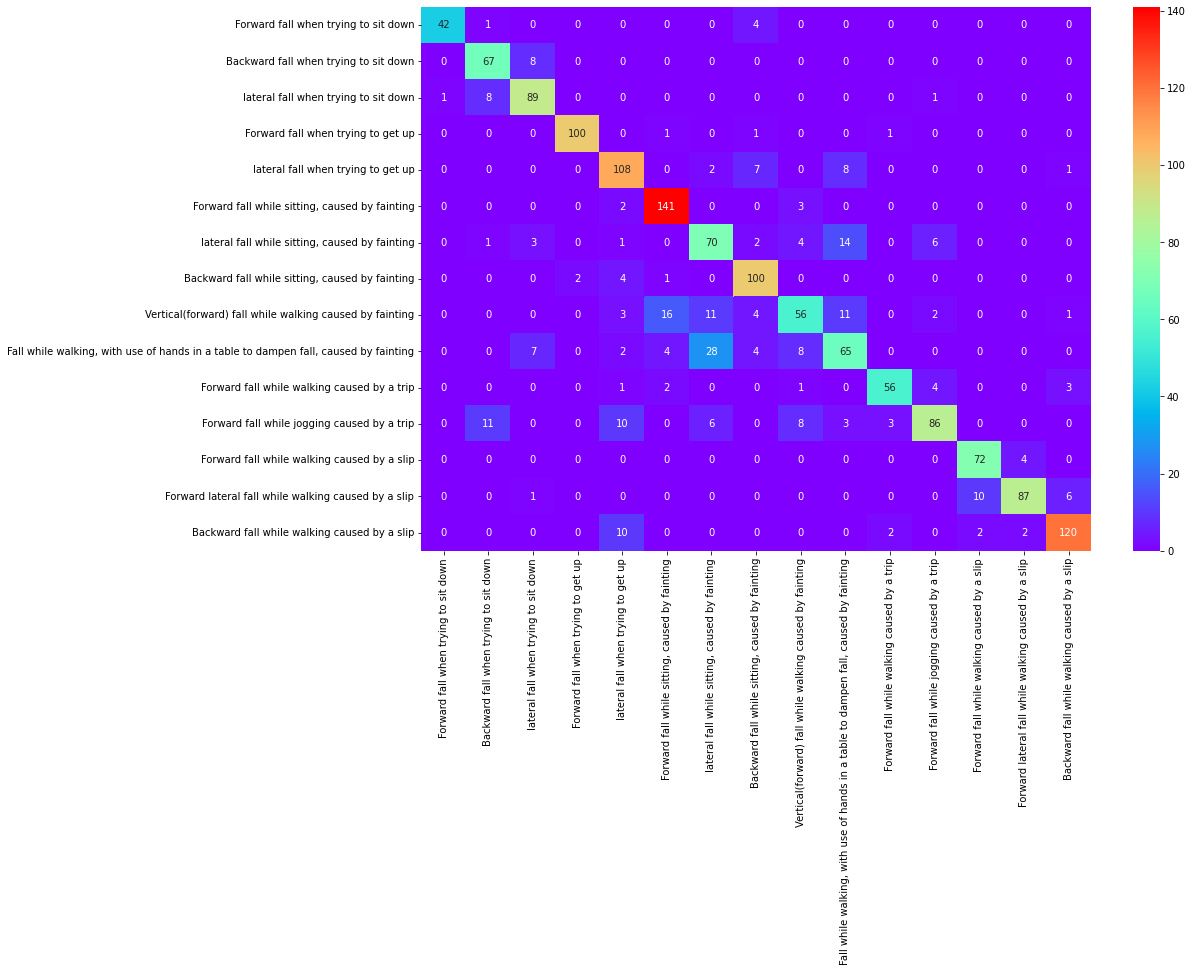

In [ ]:
true_class_names = ['Forward fall when trying to sit down', 'Backward fall when trying to sit down','lateral fall when trying to sit down','Forward fall when trying to get up','lateral fall when trying to get up','Forward fall while sitting, caused by fainting','lateral fall while sitting, caused by fainting','Backward fall while sitting, caused by fainting','Vertical(forward) fall while walking caused by fainting','Fall while walking, with use of hands in a table to dampen fall, caused by fainting','Forward fall while walking caused by a trip','Forward fall while jogging caused by a trip','Forward fall while walking caused by a slip','Forward lateral fall while walking caused by a slip','Backward fall while walking caused by a slip']
predicted_class_names = ['Forward fall when trying to sit down', 'Backward fall when trying to sit down','lateral fall when trying to sit down','Forward fall when trying to get up','lateral fall when trying to get up','Forward fall while sitting, caused by fainting','lateral fall while sitting, caused by fainting','Backward fall while sitting, caused by fainting','Vertical(forward) fall while walking caused by fainting','Fall while walking, with use of hands in a table to dampen fall, caused by fainting','Forward fall while walking caused by a trip','Forward fall while jogging caused by a trip','Forward fall while walking caused by a slip','Forward lateral fall while walking caused by a slip','Backward fall while walking caused by a slip']
df_cnf_matrix = pd.DataFrame(confusion_matrix(y_test,Y_pred), index = true_class_names, columns = predicted_class_names)
plt.figure(figsize=(15,10))
sns.heatmap(df_cnf_matrix, annot=True, fmt='d',  cmap=plt.cm.rainbow)